In [ ]:

from numba import cuda, int32
import numpy as np
import math
import time

def generateRandomVector(dimension):
    return np.random.randint(low=0, high=10, size=dimension)

def cpuVectorSum(X, Y):
    if len(X) != len(Y):
        raise Exception('Can\'t summate vectors with provided dimensions')

    result = np.zeros(len(X))

    for i in range(len(X)):
      result[i] += X[i] + Y[i]

    return result

# Основано на https://numba
TPB = 16

@cuda.jit
def vectorSum(a, b, c):
    # like threadIdx.x + (blockIdx.x * blockDim.x)
    tid = cuda.grid(1)
    size = len(c)

    if tid < size:
        c[tid] = a[tid] + b[tid]

def gpuVectorSum(X, Y):
    result_host = np.zeros(len(X))

    # передача данных на устройство
    X_device = cuda.to_device(X)
    Y_device = cuda.to_device(Y)
    result_device = cuda.to_device(result_host)

    vectorSum.forall(len(X))(X_device, Y_device, result_device)
    #передача данных с девайса на хост
    result_host = result_device.copy_to_host()
    return result_host

if __name__ == "__main__":
    size = [1000, 10000, 30000, 50000, 100000, 250000, 500000, 750000, 1000000]
    time_cpu = []
    time_gpu = []
    for k in size:
      s1 = 0
      s2 = 0
      for i in range (10):
        X = generateRandomVector(k)
        Y = generateRandomVector(k)

        start = time.time()

        result =  cpuVectorSum(X, Y)
        end = time.time()

        s1+=end - start

        start = time.time()
        result1 = gpuVectorSum(X, Y)
        end = time.time()
        s2+=end - start
        print (np.array_equal(result1,result))
      time_cpu.append (s1/10)
      time_gpu.append (s2/10)
    print ("Results")
    print("CPU time - ", time_cpu)
    print("GPU time - ", time_gpu)

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 30 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


True
True
True
True
True
True
True


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


True
True
True
True
True
True
True
True
True
True

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 98 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))



True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Results
CPU time -  [0.0009224653244018554, 0.014687252044677735, 0.04207873344421387, 0.06520402431488037, 0.13403663635253907, 0.21209778785705566, 0.36282427310943605, 0.39262821674346926, 0.6933961868286133]
GPU time -  [0.1840970516204834, 0.0030168533325195313, 0.005835413932800293, 0.003259897232055664, 0.007485342025756836, 0.0051298379898071286, 0.008149552345275878, 0.00897665023803711, 0.012472867965698242]


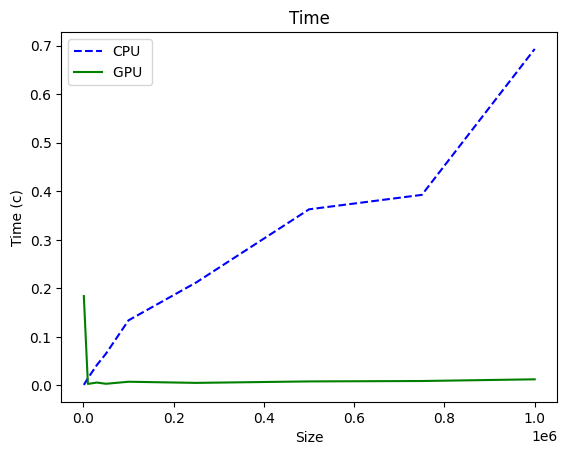

In [ ]:
import matplotlib.pyplot as plt
plt.title('Time')
plt.xlabel('Size')
plt.ylabel('Time (c)')
plt.plot(size,time_cpu,'b--',size,time_gpu,'g')
plt.legend(['CPU','GPU '], loc=2)
plt.show()

0.0009224653244018554


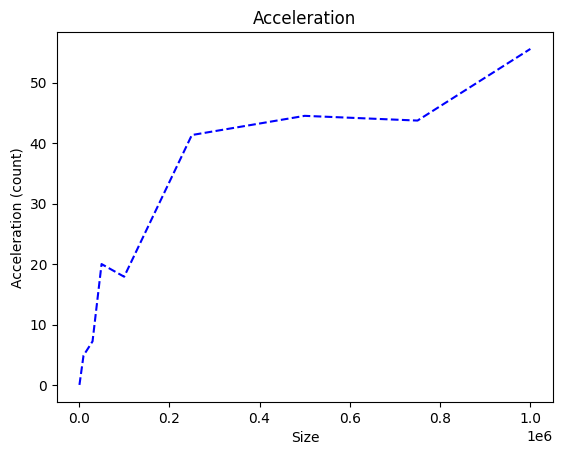

In [ ]:
plt.cla()
plt.title('Acceleration')
plt.xlabel('Size')
plt.ylabel('Acceleration (count)')
accel = []
a = time_cpu[0]
print(a)
for i in range (len(time_cpu)):
  accel.append(time_cpu[i]/time_gpu[i])

plt.plot(size,accel,'b--')
plt.show()